<a href="https://colab.research.google.com/github/oparamo81/lab-notebook-originals/blob/main/Copy_of_ZombieDice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Zombie Dice](https://inventwithpython.com/images/zombiedice_dice.jpg)

Rules and resources here: [Zombie Dice](http://www.sjgames.com/dice/zombiedice/)

## Part One: Strategize

Read the rules of the game carefully. On paper or a whiteboard, determine what classes and subclasses you need to create this game. What values and bahaviors belong to these classes? Think about the game step by step, what is happening and what information is needed? Try to forget about specific lines of code for this part and maybe even spend MOST of your time here planning. Draw [class diagrams](http://greenteapress.com/thinkpython2/html/thinkpython2019.html) for classes and flow charts for each function.

**Requirements to account for in your strategy:**

- You will need a `Dice` class, a `ZombieDiceGame` class, and a `Player` class with appropriate attribute values and functions, along with `Dice` subclasses to represent the green, yellow, and red dice that come with the game. 
- Dice subclasses should have emoji faces, rather than dots and keep track of whether the roll result is a brain, blast, or footprints. Because dice still have 6 sides, and dictionaries require unique keys, it may be useful to keep the value of the roll attribute numerical.
- At least 2 `Player` subclasses, one representing a different strategy than your default (e.g., greedy or random) and the other to implement an `InteractiveMode` where user input determines whether to roll again or not
- All rules and features of the game should be implemented correctly, including but not limited to allowing for 2 or more players, using 13 dice, finishing the round even after a player has won, etc.
- If you are working in a team, you must also implement one of the [Zombie Dice expansions](https://en.wikipedia.org/wiki/Zombie_Dice#Expansions): *Zombie Dice 2: Double Feature* with 3 additional special dice, or *Zombie Dice 3: School Bus* with a 12-sided dice and some more intricate player decision making.

## Part Two: Implement

A `Dice` class is provided for you in the cell below. You may adapt the `Dice` class definition or use it as is. Either way, you will write new `GreenDice`,`YellowDice`, and `RedDice` subclasses.

Your `ZombieDiceGame` class should facilitate players taking turns and determine when a player wins. Instanciating a new game should at least require `Player` objects, _who_ will play the game. `ZombieDiceGame` must accept a variable number of players. For example...

    p1 = Player('Camila')
    p2 = GreedyPlayer('Leo')
    p3 = InteractiveMode('Rodrigo')
    
    z = ZombieDiceGame(p1, p2, p3)
    z.play()

Your `Player` class should model behaviors of following the rules to take a turn and making choices in the game, which can be random, strategic, some default, or based on input like the `InteractiveMode` will be.

All of your class definitions should demonstrate:

- separation of concerns, 
- proper use of naming conventions, 
- proper use of class and object attributes, 
- proper use of arguments including `self`, 
- well-named functions and variables and/or clear, concise documentation (i.e., your code should be easy to read), 
- appropriate use of loops and data structures as needed (e.g., lists, dictionaries, tuples)

And when you instantiate objects and call the methods of those objects (Part 3) your code should run without errors.

**Optional, fun:** Change the theme. Instead of *zombies* chasing *humans* collecting *brains*, your game can be based on any chase-and-collect scenario. Must be non-violent if game characters are based on real people.

In [80]:
!pip3 install emoji

In [ ]:
# https://pypi.org/project/emoji/
import emoji

In [ ]:
# For reference...
print(emoji.emojize('Possible new :woman_zombie::man_zombie: Dice faces... :brain:, :collision:, :footprints:'))
print('Copying and pasting 🧟‍♀️, 🧟‍♂️, 🧠, 💥, 👣 also usually works')

Possible new 🧟‍♀️🧟‍♂️ Dice faces... 🧠, 💥, 👣
Copying and pasting 🧟‍♀️, 🧟‍♂️, 🧠, 💥, 👣 also usually works


In [ ]:
from random import choice, randint
from time import sleep

class Dice:
    faces = {1: '[ . ]', 2: '[ : ]', 3: '[: .]', 
             4:'[: :]', 5: '[:.:]', 6: '[:::]'}
    
    def __init__(self, sides=6):
        self.sides = sides
        self.value = None
        self.type = None
        
    def __str__(self):
        #return 1
        print(self.getType() + ':')
        if self.value == None:
            return 'Ready to roll!'
        
        #elif self.value > 6:
            #return '[ ' + str(self.value) + ' ]'
        
        else:
            return str(self.faces[self.value])
        
    def roll(self):
        self.value = randint(1,self.sides)
        return self.getValue()

    def getValue(self):
        return self.faces[self.value]

    def getType(self):
        return self.type

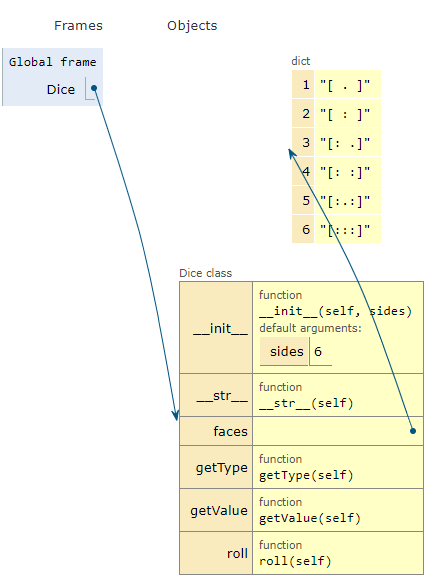

In [ ]:
# Implement Dice subclasses.
class RedDice(Dice):
    faces = {1: '💥', 2: '💥', 3: '💥', 4: '👣', 5: '👣', 6: '🧠'}

    def __init__(self):
        Dice.__init__(self)
        self.type = 'Red'

class YellowDice(Dice):
    faces = {1: '💥', 2: '💥', 3: '👣', 4: '👣', 5: '🧠', 6: '🧠'}

    def __init__(self):
        Dice.__init__(self)
        self.type = 'Yellow'

class GreenDice(Dice):
    faces = {1: '💥', 2: '👣', 3: '👣', 4: '🧠', 5: '🧠', 6: '🧠'}

    def __init__(self):
        Dice.__init__(self)
        self.type = 'Green'

class HunkDice

        

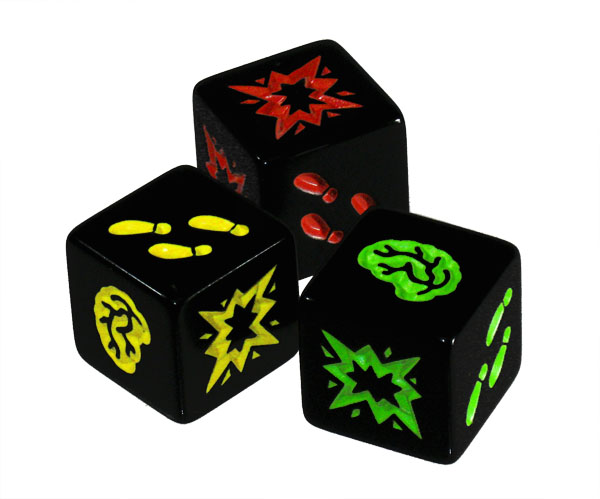

In [ ]:
# Implement a Player class and subclasses.
class Player:
    def __init__(self, name):
        self.name = name
        self.score = 0
        self.die = []
        self.shotguns = 0
        self.footprints = 0
        self.brains = 0

    #retrieve player score
    def getScore(self):
        return self.score

    #Adds a dice to the player's next roll
    def addDice(self):
        dice = randint(1, 3)
        if dice == 1:
            addedDice = GreenDice()
        elif dice == 2:
            addedDice = YellowDice()
        else:
            addedDice = RedDice()
        self.die.append(addedDice)

    #Prints the Dice in the player's possession
    def printDice(self):
        for i in range(len(self.die)):
            print(self.die[i])

    #Player does their turn, can choose to stand or continue
    def doTurn(self):
        rolling = True
        for i in range(3):
            self.addDice()

        while rolling:
            for i in range(3):
                roll = self.die[i].roll()
                if roll == '💥':
                    self.shotguns += 1
                elif roll == '👣':
                    self.footprints += 1
                else:
                    self.brains += 1
            
            print('Dice:')
            self.printDice()

            if self.shotguns >= 3:
                rolling = False
                print('Three Shotguns!')
                break

            answer = input('Would you like to roll again? y/n:').lower()
            if answer == 'n':
                self.score += self.brains
                self.brains = 0
                rolling = False
                break

            for dice in self.die:
                if dice.getValue() == '💥' or dice.getValue() == '🧠':
                    self.die.remove(dice)
            
            while len(self.die) < 3:
                self.addDice()
        
        self.die.clear()
        print(self.name + 's Score: ' + str(self.score))


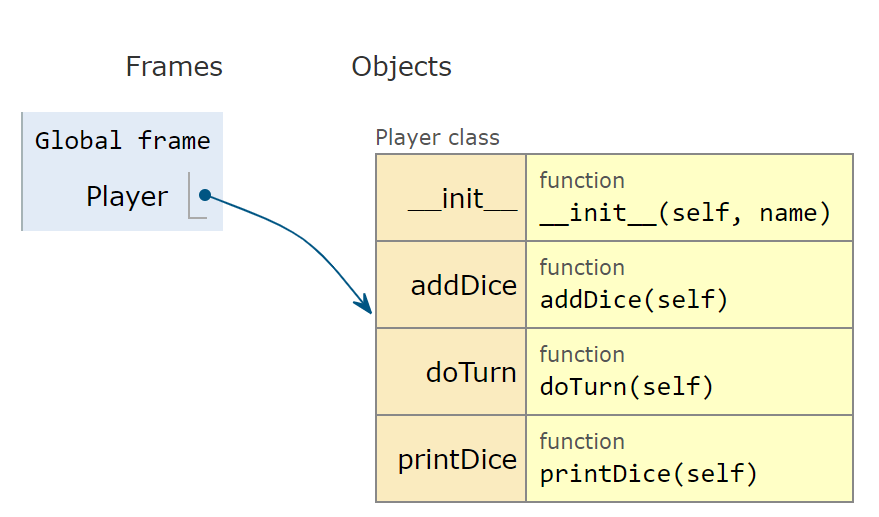

In [ ]:
# Implement the ZombieDiceGame class.
class ZombieDiceGame: 
    def __init__(self):
        self.players = []
        self.round = 1

    #add players to the game
    def addPlayers(self):
        addingPlayers = True
        while addingPlayers:
            addedPlayerName = input("Input the name of the player")
            self.players.append(Player(addedPlayerName))
            addAnotherPlayer = input("Add another player? y/n:")
            if addAnotherPlayer == 'n':
                addingPlayers = False

    #play the zombie dice game with added players
    def play(self):
        self.addPlayers()
        playing = True
        while playing:
            print("Round " + str(self.round))
            #Have each player do a turn
            for player in self.players:
                print(player.name + 's Turn:')
                player.doTurn()
                if player.score >= 13:
                    playing = False
            #Increment the round counter
            self.round += 1
        winners = []
        winningScore = 0
        for player in self.players:
            if player.getScore() > winningScore:
                winningScore = player.getScore()
        for player in self.players:
            if player.getScore() == winningScore:
                winners.append(player)
        return winners


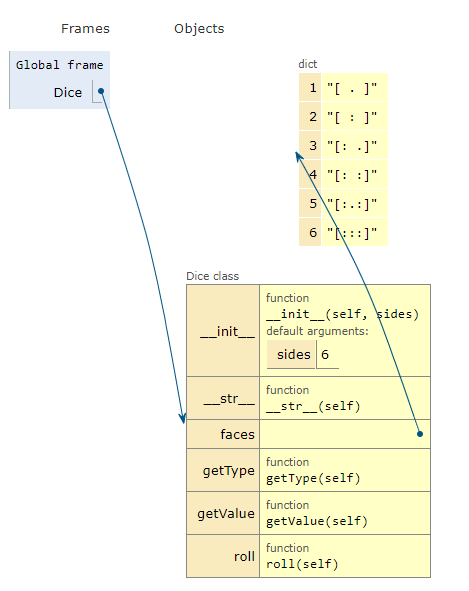

## Part Three: Play

Create a new `ZombieDiceGame` object, and simulate or play a game. Methods from your classes should provide print statements that show what is happening at each step. You should have additional print statements showing whose turn it is, the scores after each turn, and who wins when the game is over.

In [ ]:
# Instantiate a new ZombieDiceGame object, and play the game!
game = ZombieDiceGame()
game.play()

Input the name of the playerOzzy 
Add another player? y/n:y
Input the name of the playerLawrence 
Add another player? y/n:y
Input the name of the playerOwen 
Add another player? y/n:n
Round 1
Ozzy s Turn:
Dice:
Yellow:
👣
Yellow:
💥
Yellow:
👣
Would you like to roll again? y/n:y
Dice:
Yellow:
👣
Yellow:
👣
Yellow:
🧠
Would you like to roll again? y/n:n
Ozzy s Score: 1
Lawrence s Turn:
Dice:
Red:
👣
Green:
🧠
Yellow:
🧠
Would you like to roll again? y/n:n
Lawrence s Score: 2
Owen s Turn:
Dice:
Yellow:
👣
Yellow:
🧠
Green:
🧠
